In [20]:
import math
import sys

sys.path.append("/mnt/workbench/source/goto.globe/package")

In [21]:
import sympy

import geometrik.threed as g3d

import goto.globe.blip
import goto.globe.lineto

t = sympy.symbols('t')

In [22]:
BOD = goto.globe.blip.Blip(44.828333, -0.715556).as_vector
MXP = goto.globe.blip.Blip(45.63, 8.723056).as_vector
MRS = goto.globe.blip.Blip(43.436667, 5.215).as_vector
LHR = goto.globe.blip.Blip(51.4775, -0.461389).as_vector
LIS = goto.globe.blip.Blip(38.774167, -9.134167).as_vector
RKV = goto.globe.blip.Blip(64.13, -21.940556).as_vector

# A, B, C = LIS, MRS, RKV
A, B, C = LIS, LHR, MRS

lineto_AB = goto.globe.lineto.LineTo(A, B)
lineto_BC = goto.globe.lineto.LineTo(B, C)

l12 = lineto_AB.side_point(0.0, 0.02, 1.0)
r12 = lineto_AB.side_point(0.0, 0.02, -1.0)
l21 = lineto_AB.side_point(1.0, 0.01, 1.0)
r21 = lineto_AB.side_point(1.0, 0.01, -1.0)

l23 = lineto_BC.side_point(0.0, 0.01, 1.0)
r23 = lineto_BC.side_point(0.0, 0.01, -1.0)
l32 = lineto_BC.side_point(1.0, 0.03, 1.0)
r32 = lineto_BC.side_point(1.0, 0.03, -1.0)

lineto_BA = goto.globe.lineto.LineTo(B, A)
q = lineto_BA.Lz.signed_angle_to(lineto_BC.Ly, B)
Q = math.copysign(1.0, q) * (lineto_BC.Lz - lineto_BA.Lz ).normalized()

if q < 0.0 :
	line_12 = goto.globe.lineto.LineTo(r12, r21)
	line_32 = goto.globe.lineto.LineTo(r32, r23)
elif 0.0 < q :
	line_12 = goto.globe.lineto.LineTo(l21, l12)
	line_32 = goto.globe.lineto.LineTo(l32, l23)
else :
	raise ValueError
I = line_12.intersection(line_32)

In [23]:
val = {
	'A_x': A.x, 'A_y': A.y, 'A_z': A.z,
	'B_x': B.x, 'B_y': B.y, 'B_z': B.z,
	'I_x': I.x, 'I_y': I.y, 'I_z': I.z,
	'Q_x': Q.x, 'Q_y': Q.y, 'Q_z': Q.z,
}
val

{'A_x': 0.7697342841946113,
 'A_y': -0.12376229119388332,
 'A_z': 0.6262523668728525,
 'B_x': 0.6228017242088094,
 'B_y': -0.005015379468955344,
 'B_z': 0.7823636355885392,
 'I_x': 0.6422025720455385,
 'I_y': -0.006496852398333603,
 'I_z': 0.7665074346456198,
 'Q_x': 0.7822033227551325,
 'Q_y': -0.01724130460944277,
 'Q_z': -0.6227846331487269}

In [34]:
A = g3d.Vector( * sympy.symbols('A_x A_y A_z'), True )
B = g3d.Vector( * sympy.symbols('B_x B_y B_z'), True )
C = g3d.Vector( * sympy.symbols('C_x C_y C_z'), True )

I = g3d.Vector( * sympy.symbols('I_x I_y I_z'), True )
Q = g3d.Vector( * sympy.symbols('Q_x Q_y Q_z'), True )

V = B * sympy.cos(t) + Q * sympy.sin(t)

In [35]:
Pab_Z = (A @ B).normalized()
Pab_Y = (Pab_Z @ V).normalized()
Pab_X = (Pab_Y @ Pab_Z)
Pab_X._is_unit = True

In [42]:
V.x

B_x*cos(t) + Q_x*sin(t)

In [45]:
[i.subs(val).subs({'t': 0.05}) for i in Pab_X]

[0.652180315442888, -0.0265327496178270, 0.757599398987706]

In [44]:
[i.subs(val).subs({'t': 0.05}) for i in V]

[0.661117256500048, -0.00587081763212138, 0.750259626168288]

In [7]:
## Left angle

In [8]:
left_angle_cached = True
if left_angle_cached :
    left_angle = sympy.sqrt(((A.x**2*B.x**2*B.y**2 + A.x**2*B.x**2*B.z**2 + A.x**2*B.y**4 + 2*A.x**2*B.y**2*B.z**2 + A.x**2*B.z**4 - 2*A.x*A.y*B.x**3*B.y - 2*A.x*A.y*B.x*B.y**3 - 2*A.x*A.y*B.x*B.y*B.z**2 - 2*A.x*A.z*B.x**3*B.z - 2*A.x*A.z*B.x*B.y**2*B.z - 2*A.x*A.z*B.x*B.z**3 + A.y**2*B.x**4 + A.y**2*B.x**2*B.y**2 + 2*A.y**2*B.x**2*B.z**2 + A.y**2*B.y**2*B.z**2 + A.y**2*B.z**4 - 2*A.y*A.z*B.x**2*B.y*B.z - 2*A.y*A.z*B.y**3*B.z - 2*A.y*A.z*B.y*B.z**3 + A.z**2*B.x**4 + 2*A.z**2*B.x**2*B.y**2 + A.z**2*B.x**2*B.z**2 + A.z**2*B.y**4 + A.z**2*B.y**2*B.z**2)*sympy.cos(t)**2 + (A.x**2*B.x*B.y**2*Q.x + A.x**2*B.x*B.z**2*Q.x + A.x**2*B.y**3*Q.y + A.x**2*B.y**2*B.z*Q.z + A.x**2*B.y*B.z**2*Q.y + A.x**2*B.z**3*Q.z - 2*A.x*A.y*B.x**2*B.y*Q.x - 2*A.x*A.y*B.x*B.y**2*Q.y - 2*A.x*A.y*B.x*B.y*B.z*Q.z - 2*A.x*A.z*B.x**2*B.z*Q.x - 2*A.x*A.z*B.x*B.y*B.z*Q.y - 2*A.x*A.z*B.x*B.z**2*Q.z + A.y**2*B.x**3*Q.x + A.y**2*B.x**2*B.y*Q.y + A.y**2*B.x**2*B.z*Q.z + A.y**2*B.x*B.z**2*Q.x + A.y**2*B.y*B.z**2*Q.y + A.y**2*B.z**3*Q.z - 2*A.y*A.z*B.x*B.y*B.z*Q.x - 2*A.y*A.z*B.y**2*B.z*Q.y - 2*A.y*A.z*B.y*B.z**2*Q.z + A.z**2*B.x**3*Q.x + A.z**2*B.x**2*B.y*Q.y + A.z**2*B.x**2*B.z*Q.z + A.z**2*B.x*B.y**2*Q.x + A.z**2*B.y**3*Q.y + A.z**2*B.y**2*B.z*Q.z)*sympy.sin(2*t) + (A.x**2*B.y**2*Q.x**2 + A.x**2*B.y**2*Q.y**2 + 2*A.x**2*B.y*B.z*Q.y*Q.z + A.x**2*B.z**2*Q.x**2 + A.x**2*B.z**2*Q.z**2 - 2*A.x*A.y*B.x*B.y*Q.x**2 - 2*A.x*A.y*B.x*B.y*Q.y**2 - 2*A.x*A.y*B.x*B.z*Q.y*Q.z - 2*A.x*A.y*B.y*B.z*Q.x*Q.z + 2*A.x*A.y*B.z**2*Q.x*Q.y - 2*A.x*A.z*B.x*B.y*Q.y*Q.z - 2*A.x*A.z*B.x*B.z*Q.x**2 - 2*A.x*A.z*B.x*B.z*Q.z**2 + 2*A.x*A.z*B.y**2*Q.x*Q.z - 2*A.x*A.z*B.y*B.z*Q.x*Q.y + A.y**2*B.x**2*Q.x**2 + A.y**2*B.x**2*Q.y**2 + 2*A.y**2*B.x*B.z*Q.x*Q.z + A.y**2*B.z**2*Q.y**2 + A.y**2*B.z**2*Q.z**2 + 2*A.y*A.z*B.x**2*Q.y*Q.z - 2*A.y*A.z*B.x*B.y*Q.x*Q.z - 2*A.y*A.z*B.x*B.z*Q.x*Q.y - 2*A.y*A.z*B.y*B.z*Q.y**2 - 2*A.y*A.z*B.y*B.z*Q.z**2 + A.z**2*B.x**2*Q.x**2 + A.z**2*B.x**2*Q.z**2 + 2*A.z**2*B.x*B.y*Q.x*Q.y + A.z**2*B.y**2*Q.y**2 + A.z**2*B.y**2*Q.z**2)*sympy.sin(t)**2)/(A.x**2*B.y**2 + A.x**2*B.z**2 - 2*A.x*A.y*B.x*B.y - 2*A.x*A.z*B.x*B.z + A.y**2*B.x**2 + A.y**2*B.z**2 - 2*A.y*A.z*B.y*B.z + A.z**2*B.x**2 + A.z**2*B.y**2))
else :
    left_angle = (Pab_X * V).expand().simplify().collect(sympy.sin(2*t)).collect(sympy.cos(2*t)).collect(sympy.sin(t)).collect(sympy.cos(t))
left_angle

sqrt(((A_x**2*B_x**2*B_y**2 + A_x**2*B_x**2*B_z**2 + A_x**2*B_y**4 + 2*A_x**2*B_y**2*B_z**2 + A_x**2*B_z**4 - 2*A_x*A_y*B_x**3*B_y - 2*A_x*A_y*B_x*B_y**3 - 2*A_x*A_y*B_x*B_y*B_z**2 - 2*A_x*A_z*B_x**3*B_z - 2*A_x*A_z*B_x*B_y**2*B_z - 2*A_x*A_z*B_x*B_z**3 + A_y**2*B_x**4 + A_y**2*B_x**2*B_y**2 + 2*A_y**2*B_x**2*B_z**2 + A_y**2*B_y**2*B_z**2 + A_y**2*B_z**4 - 2*A_y*A_z*B_x**2*B_y*B_z - 2*A_y*A_z*B_y**3*B_z - 2*A_y*A_z*B_y*B_z**3 + A_z**2*B_x**4 + 2*A_z**2*B_x**2*B_y**2 + A_z**2*B_x**2*B_z**2 + A_z**2*B_y**4 + A_z**2*B_y**2*B_z**2)*cos(t)**2 + (A_x**2*B_x*B_y**2*Q_x + A_x**2*B_x*B_z**2*Q_x + A_x**2*B_y**3*Q_y + A_x**2*B_y**2*B_z*Q_z + A_x**2*B_y*B_z**2*Q_y + A_x**2*B_z**3*Q_z - 2*A_x*A_y*B_x**2*B_y*Q_x - 2*A_x*A_y*B_x*B_y**2*Q_y - 2*A_x*A_y*B_x*B_y*B_z*Q_z - 2*A_x*A_z*B_x**2*B_z*Q_x - 2*A_x*A_z*B_x*B_y*B_z*Q_y - 2*A_x*A_z*B_x*B_z**2*Q_z + A_y**2*B_x**3*Q_x + A_y**2*B_x**2*B_y*Q_y + A_y**2*B_x**2*B_z*Q_z + A_y**2*B_x*B_z**2*Q_x + A_y**2*B_y*B_z**2*Q_y + A_y**2*B_z**3*Q_z - 2*A_y*A_z*B_x*B_y

In [9]:
repr(left_angle)

'sqrt(((A_x**2*B_x**2*B_y**2 + A_x**2*B_x**2*B_z**2 + A_x**2*B_y**4 + 2*A_x**2*B_y**2*B_z**2 + A_x**2*B_z**4 - 2*A_x*A_y*B_x**3*B_y - 2*A_x*A_y*B_x*B_y**3 - 2*A_x*A_y*B_x*B_y*B_z**2 - 2*A_x*A_z*B_x**3*B_z - 2*A_x*A_z*B_x*B_y**2*B_z - 2*A_x*A_z*B_x*B_z**3 + A_y**2*B_x**4 + A_y**2*B_x**2*B_y**2 + 2*A_y**2*B_x**2*B_z**2 + A_y**2*B_y**2*B_z**2 + A_y**2*B_z**4 - 2*A_y*A_z*B_x**2*B_y*B_z - 2*A_y*A_z*B_y**3*B_z - 2*A_y*A_z*B_y*B_z**3 + A_z**2*B_x**4 + 2*A_z**2*B_x**2*B_y**2 + A_z**2*B_x**2*B_z**2 + A_z**2*B_y**4 + A_z**2*B_y**2*B_z**2)*cos(t)**2 + (A_x**2*B_x*B_y**2*Q_x + A_x**2*B_x*B_z**2*Q_x + A_x**2*B_y**3*Q_y + A_x**2*B_y**2*B_z*Q_z + A_x**2*B_y*B_z**2*Q_y + A_x**2*B_z**3*Q_z - 2*A_x*A_y*B_x**2*B_y*Q_x - 2*A_x*A_y*B_x*B_y**2*Q_y - 2*A_x*A_y*B_x*B_y*B_z*Q_z - 2*A_x*A_z*B_x**2*B_z*Q_x - 2*A_x*A_z*B_x*B_y*B_z*Q_y - 2*A_x*A_z*B_x*B_z**2*Q_z + A_y**2*B_x**3*Q_x + A_y**2*B_x**2*B_y*Q_y + A_y**2*B_x**2*B_z*Q_z + A_y**2*B_x*B_z**2*Q_x + A_y**2*B_y*B_z**2*Q_y + A_y**2*B_z**3*Q_z - 2*A_y*A_z*B_x*B_

In [9]:
left_angle.subs(val)

1.0*sqrt(0.775581835221109*sin(t)**2 + 5.27816042921794e-16*sin(2*t) + cos(t)**2)

In [10]:
left_angle.args[0].args[0]

1/(A_x**2*B_y**2 + A_x**2*B_z**2 - 2*A_x*A_y*B_x*B_y - 2*A_x*A_z*B_x*B_z + A_y**2*B_x**2 + A_y**2*B_z**2 - 2*A_y*A_z*B_y*B_z + A_z**2*B_x**2 + A_z**2*B_y**2)

In [11]:
# terme en cos(t)^2
cos_t_2 = (left_angle.args[0].args[1].args[0].args[1] * left_angle.args[0].args[0]).simplify()
cos_t_2

B_x**2 + B_y**2 + B_z**2

In [12]:
# terme en sin(t)^2
sin_t_2 = (left_angle.args[0].args[1].args[1].args[1] * left_angle.args[0].args[0]).expand().simplify()
sin_t_2

(A_x**2*B_y**2*Q_x**2 + A_x**2*B_y**2*Q_y**2 + 2*A_x**2*B_y*B_z*Q_y*Q_z + A_x**2*B_z**2*Q_x**2 + A_x**2*B_z**2*Q_z**2 - 2*A_x*A_y*B_x*B_y*Q_x**2 - 2*A_x*A_y*B_x*B_y*Q_y**2 - 2*A_x*A_y*B_x*B_z*Q_y*Q_z - 2*A_x*A_y*B_y*B_z*Q_x*Q_z + 2*A_x*A_y*B_z**2*Q_x*Q_y - 2*A_x*A_z*B_x*B_y*Q_y*Q_z - 2*A_x*A_z*B_x*B_z*Q_x**2 - 2*A_x*A_z*B_x*B_z*Q_z**2 + 2*A_x*A_z*B_y**2*Q_x*Q_z - 2*A_x*A_z*B_y*B_z*Q_x*Q_y + A_y**2*B_x**2*Q_x**2 + A_y**2*B_x**2*Q_y**2 + 2*A_y**2*B_x*B_z*Q_x*Q_z + A_y**2*B_z**2*Q_y**2 + A_y**2*B_z**2*Q_z**2 + 2*A_y*A_z*B_x**2*Q_y*Q_z - 2*A_y*A_z*B_x*B_y*Q_x*Q_z - 2*A_y*A_z*B_x*B_z*Q_x*Q_y - 2*A_y*A_z*B_y*B_z*Q_y**2 - 2*A_y*A_z*B_y*B_z*Q_z**2 + A_z**2*B_x**2*Q_x**2 + A_z**2*B_x**2*Q_z**2 + 2*A_z**2*B_x*B_y*Q_x*Q_y + A_z**2*B_y**2*Q_y**2 + A_z**2*B_y**2*Q_z**2)/(A_x**2*B_y**2 + A_x**2*B_z**2 - 2*A_x*A_y*B_x*B_y - 2*A_x*A_z*B_x*B_z + A_y**2*B_x**2 + A_y**2*B_z**2 - 2*A_y*A_z*B_y*B_z + A_z**2*B_x**2 + A_z**2*B_y**2)

In [50]:
sin_t_2.subs(val)

0.775581835221110

In [13]:
# sin(2t)
sin_2t = (left_angle.args[0].args[1].args[2].args[0] * left_angle.args[0].args[0]).expand().simplify()
sin_2t

B_x*Q_x + B_y*Q_y + B_z*Q_z

In [14]:
left_angle = sympy.sqrt( sin_t_2 * sympy.sin(t)**2 + sympy.cos(t)**2 )
left_angle

sqrt(cos(t)**2 + (A_x**2*B_y**2*Q_x**2 + A_x**2*B_y**2*Q_y**2 + 2*A_x**2*B_y*B_z*Q_y*Q_z + A_x**2*B_z**2*Q_x**2 + A_x**2*B_z**2*Q_z**2 - 2*A_x*A_y*B_x*B_y*Q_x**2 - 2*A_x*A_y*B_x*B_y*Q_y**2 - 2*A_x*A_y*B_x*B_z*Q_y*Q_z - 2*A_x*A_y*B_y*B_z*Q_x*Q_z + 2*A_x*A_y*B_z**2*Q_x*Q_y - 2*A_x*A_z*B_x*B_y*Q_y*Q_z - 2*A_x*A_z*B_x*B_z*Q_x**2 - 2*A_x*A_z*B_x*B_z*Q_z**2 + 2*A_x*A_z*B_y**2*Q_x*Q_z - 2*A_x*A_z*B_y*B_z*Q_x*Q_y + A_y**2*B_x**2*Q_x**2 + A_y**2*B_x**2*Q_y**2 + 2*A_y**2*B_x*B_z*Q_x*Q_z + A_y**2*B_z**2*Q_y**2 + A_y**2*B_z**2*Q_z**2 + 2*A_y*A_z*B_x**2*Q_y*Q_z - 2*A_y*A_z*B_x*B_y*Q_x*Q_z - 2*A_y*A_z*B_x*B_z*Q_x*Q_y - 2*A_y*A_z*B_y*B_z*Q_y**2 - 2*A_y*A_z*B_y*B_z*Q_z**2 + A_z**2*B_x**2*Q_x**2 + A_z**2*B_x**2*Q_z**2 + 2*A_z**2*B_x*B_y*Q_x*Q_y + A_z**2*B_y**2*Q_y**2 + A_z**2*B_y**2*Q_z**2)*sin(t)**2/(A_x**2*B_y**2 + A_x**2*B_z**2 - 2*A_x*A_y*B_x*B_y - 2*A_x*A_z*B_x*B_z + A_y**2*B_x**2 + A_y**2*B_z**2 - 2*A_y*A_z*B_y*B_z + A_z**2*B_x**2 + A_z**2*B_y**2))

In [17]:
left_angle.subs(val)

1.0*sqrt(0.77558183522111*sin(t)**2 + cos(t)**2)

In [18]:
# computed
center_angle = (I * V).expand().simplify().collect(sympy.sin(t)).collect(sympy.cos(t))

In [19]:
# cached
center_angle = (B.x*I.x + B.y*I.y + B.z*I.z)*sympy.cos(t) + (I.x*Q.x + I.y*Q.y + I.z*Q.z)*sympy.sin(t)

In [20]:
center_angle.subs(val)

0.0250759484555707*sin(t) + 0.999684996616417*cos(t)

In [35]:
R1, P1, P2 = sympy.symbols('R_1 P_1 P_2')

In [44]:
left_equa = sympy.sqrt( R1 + (1 - R1) * sympy.cos(t)**2 )
left_equa

sqrt(R_1 + (1 - R_1)*cos(t)**2)

In [52]:
derder = sympy.diff( sympy.sqrt( R1 + (1 - R1) * sympy.cos(t)**2 ), t)

In [49]:
(sympy.sqrt( R1 * sympy.sin(t)**2 + sympy.cos(t)**2 ) - sympy.sqrt( R1 * (1 - sympy.cos(t)**2) + sympy.cos(t)**2 )).expand()

sqrt(R_1*sin(t)**2 + cos(t)**2) - sqrt(-R_1*cos(t)**2 + R_1 + cos(t)**2)

In [37]:
center_equa = P1 * sympy.cos(t) + P2 * sympy.sin(t)
center_equa

P_1*cos(t) + P_2*sin(t)

In [24]:
#u = sympy.solve(sympy.Eq(center_equa, left_equa), t)
u

NameError: name 'u' is not defined

In [25]:
u[6]

NameError: name 'u' is not defined

In [38]:
u = sympy.solve(sympy.Eq(left_equa, center_angle), t)

KeyboardInterrupt: 

## application numérique

In [28]:
math.acos( left_angle.subs(val).subs({'t': 0.05}) )

0.023678741742191207

In [29]:
math.acos( center_angle.subs(val).subs({'t': 0.05}) )

0.02494355119590972

In [30]:
V.angle_to(I).subs(val).subs({'t': 0.07})

0.0449336910463828

In [31]:
import matplotlib.pyplot as plt


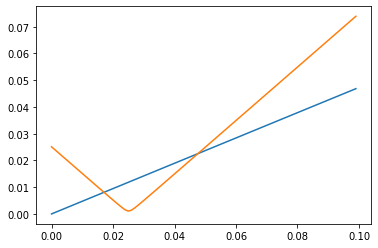

In [54]:
m = 0
n = 100
d = 0.001
t_lst = [ i*d for i in range(m, n) ]
plt.plot(t_lst, [ math.acos( left_angle.subs(val).subs({'t': t}) ) for t in t_lst ])
plt.plot(t_lst, [ math.acos( center_angle.subs(val).subs({'t': t}) ) for t in t_lst ])
plt.show()

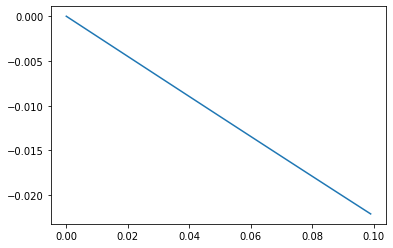

In [57]:
plt.plot(t_lst, [ derder.subs({'R_1': sin_t_2}).subs(val).subs({'t': t}) for t in t_lst ])
plt.show()